# Quadratic Discriminant Analysis 3-class Classifier

Plotting with the first two features only

In [1]:
from scipy import linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.cross_validation import cross_val_score

/root/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# import some data to play with
iris = datasets.load_iris()
X1 = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

qda = QuadraticDiscriminantAnalysis()
qda.fit(X1, Y)
scorer = make_scorer(accuracy_score)
score = cross_val_score(qda,X1,Y,cv=5,scoring=scorer)
np.mean(score)

0.78666666666666663

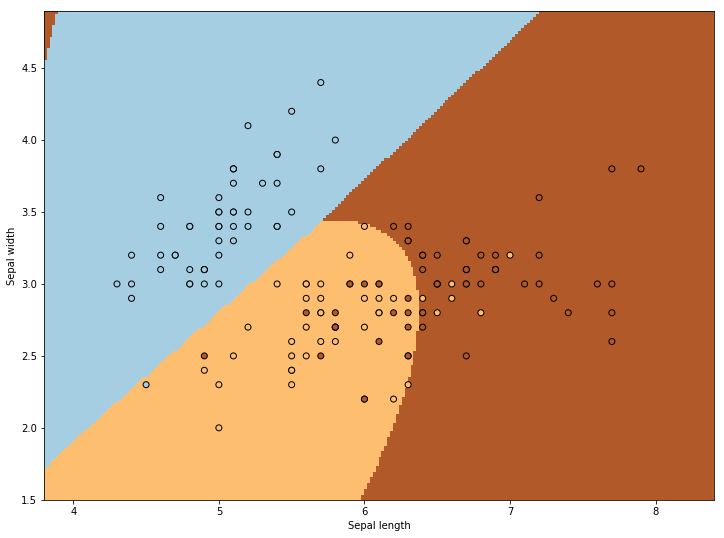

In [3]:
x_min, x_max = X1[:, 0].min() - .5, X1[:, 0].max() + .5
y_min, y_max = X1[:, 1].min() - .5, X1[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X1[:, 0], X1[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

Plotting with last two features only

In [4]:
X2 = iris.data[:, 2:]  # we only take the last two features.

# we create an instance of Neighbours Classifier and fit the data.
qda.fit(X2, Y)
scorer = make_scorer(accuracy_score)
score = cross_val_score(qda,X2,Y,cv=5,scoring=scorer)
np.mean(score)

0.97333333333333338

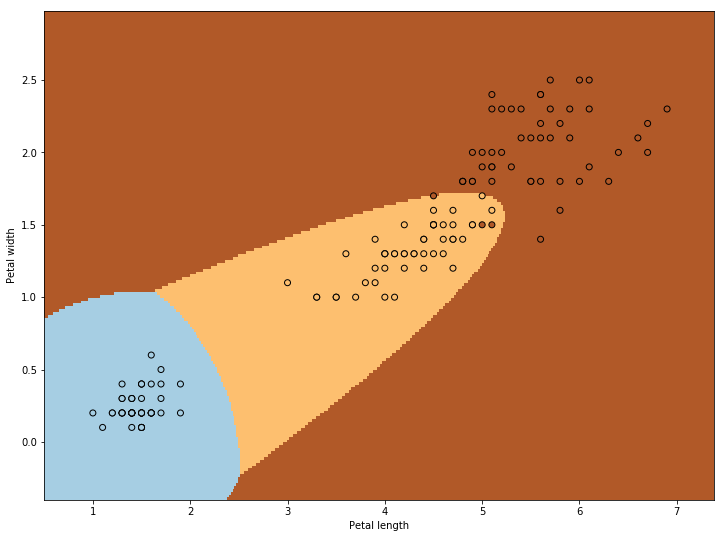

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X2[:, 0], X2[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()